In [1]:
"""
Data from spreadsheet
"""

years = [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]
rice_production = [-39.69, -7.51, -44.61, 0, -32.53, -43.36, -59.23, -76.33, -85.63, -23.83, -30.49, -29.0]

positive_rice_production = [(val + 100.0) * 3 for val in rice_production]

In [37]:
def system(t, y, Eh, Ef, *params):
    S, L, G = y
    a1, a2, a3, a4, b1, b4, b5, c1, c2, c3 = params

    dS = (a1 * S * L) + (a2 * S * G) - (a3 * S) - (a4 * Eh * S)
    dL = (b1 * L) - (b4 * L) - (b5 * S * L)
    dG = (c1 * Ef) - (c2 * G * S) - (c3 * G * L)

    return [dS, dL, dG]




"""
I wrapped everything to be able to accept inputs for Eh and Ef, sparrow hunting and grain harvesting efforts.
"""
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

years = [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]
rice_production = [-39.69, -7.51, -44.61, 0, -32.53, -43.36, -59.23, -76.33, -85.63, -23.83, -30.49, -29.0]
positive_rice_production = [(val + 100.0) * 3 for val in rice_production]

def system(t, y, Eh, Ef, *params):

    S, L, G = y
    a1, a2, a3, a4, a5, b1, b4, b5, c1, c2, c3 = params

    dS = (a1 * S * L * (1 - 1 / a5)) + (a2 * S * G) - (a3 * S) - (a4 * Eh * S)
    dL = (b1 * L) - (b4 * L) - (b5 * S * L)
    # dG = (c1 * Ef) - (c2 * G * S) - (c3 * G * L)
    dG = 0

    return [dS, dL, dG]


S0 = 10
L0 = 100
G0 = positive_rice_production[0]
y0 = [S0, L0, G0]

#        [a1,     a2,   a3,  a4,  a5      b1,  b4,  b5,   c1,   c2,   c3]
params = [0.005,  1e-7, 0.2, 0.0, 1000.0, 0.5, 0.1, 0.01, 10.0, 1e-7, 5e-8]

t_span = (0, 120)
t_eval = np.linspace(0, 120, 1000)


def run_simulation(Eh=0.0, Ef=0.0):
    """Simulate and optionally plot the system for given hunting/farming efforts."""
    sol = solve_ivp(system, t_span, y0, t_eval=t_eval, args=(Eh, Ef, *params))

    plt.figure(figsize=(8,5))
    plt.plot(sol.t, sol.y[0], label=f'Sparrows')
    plt.plot(sol.t, sol.y[1], label=f'Locusts')
    plt.plot(sol.t, sol.y[2], label=f'Grain')
    plt.xlabel('Time (years)')
    plt.ylabel('Individuals / Index')
    plt.title(f'Simulation: Eh={Eh}, Ef={Ef}')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(sol)
    print("Year |   S (sparrows)   |   L (locusts)   |   G (grain)")
    print("-" * 52)
    for year, S, L, G in zip(years, *sol.y):
        print(f"{year:<5} | {S:>15.3f} | {L:>15.3f} | {G:>15.3f}")



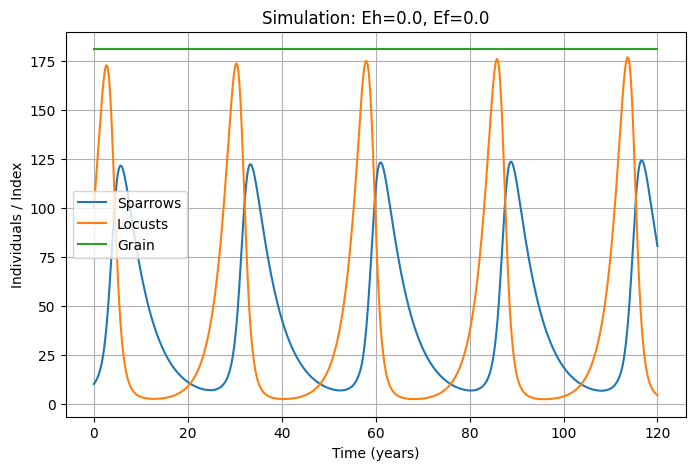

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.201e-01 ...  1.199e+02  1.200e+02]
        y: [[ 1.000e+01  1.038e+01 ...  8.219e+01  8.045e+01]
            [ 1.000e+02  1.036e+02 ...  4.516e+00  4.297e+00]
            [ 1.809e+02  1.809e+02 ...  1.809e+02  1.809e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 416
     njev: 0
      nlu: 0
Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          10.000 |         100.000 |         180.930
1955  |          10.378 |         103.646 |         180.930
1956  |          10.794 |         107.373 |         180.930
1957  |          11.252 |         111.175 |         180.930
1958  |          11.757 |         115.046 |         180.930
1959  |          12.312 |         118.978 |         180.930
1960  |          12.925 |         122.958 |         180.930
1961  |          13.600 |

In [39]:
run_simulation(Eh=0.0, Ef=0.0)